# Prosper Loan Data Exploration by `Vital Hakizimana`

## Preliminary Wrangling
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings 
warnings.filterwarnings ("ignore")


In [2]:
# load in the dataset into a pandas dataframe, print statistics
LoanData_df = pd.read_csv('ProsperLoanData.csv')
LoanData_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
LoanData_df['EmploymentStatus']

0         Self-employed
1              Employed
2         Not available
3              Employed
4              Employed
              ...      
113932         Employed
113933         Employed
113934         Employed
113935        Full-time
113936         Employed
Name: EmploymentStatus, Length: 113937, dtype: object

In [4]:
# check the shape of the data set
LoanData_df.shape

(113937, 81)

In [5]:
# generate the columns
columns = LoanData_df.columns

In [6]:
# checking NaN values for each columns
Features_NaN_values = {}
for column in columns:
    Features_NaN_values[column] = LoanData_df[column].isnull().sum()
    
# creating a data frame indicating each column with their corresponding NaN values
Features_NaN_values_df = pd.DataFrame([Features_NaN_values]).T.rename(columns={0:'NaN_values'})
Features_NaN_values_df

,NaN_values
ListingKey,0
ListingNumber,0
ListingCreationDate,0
CreditGrade,84984
Term,0
...,...
PercentFunded,0
Recommendations,0
InvestmentFromFriendsCount,0
InvestmentFromFriendsAmount,0


In [7]:
# Extracting columns without NaN valeus
Features_without_NaN = Features_NaN_values_df[Features_NaN_values_df['NaN_values']==0]
Features_without_NaN.head(2)

,NaN_values
ListingKey,0
ListingNumber,0


In [8]:
# Extracting columns with NaN valeus
Features_with_NaN = Features_NaN_values_df[Features_NaN_values_df['NaN_values']!=0]
Features_with_NaN.head(2)

,NaN_values
CreditGrade,84984
ClosedDate,58848


### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features. All these features can not be analysed at the same time as some of them are more important than others depending on the kind of analysis and the questions to be answered. In this review, I am going to remain with few features that I am going to use in my analysis.


In [9]:
# Selection of important features which should be used i.e removing columns of similar meanings
# and removing columns with more NaN values using manual visualizations
# by remaining with columns that are sensitive to the target questions related to the loan requested

Important_features = ['Term','LoanStatus','BorrowerAPR','BorrowerRate','BorrowerState','Occupation','EmploymentStatus',
                      'EmploymentStatusDuration','IsBorrowerHomeowner','TotalInquiries','AvailableBankcardCredit',
                     'TotalTrades','IncomeRange','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment',
                     'Recommendations']

len(Important_features)

17

In [10]:
# Now here is the final data frame to work on
LoanData_df_final = LoanData_df[Important_features]
LoanData_df_final.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,TotalInquiries,AvailableBankcardCredit,TotalTrades,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Recommendations
0,36,Completed,0.16516,0.1580,CO,Other,Self-employed,2.0,True,3.0,1500.0,11.0,"$25,000-49,999",3083.333333,9425,330.43,0
1,36,Current,0.12016,0.0920,CO,Professional,Employed,44.0,False,5.0,10266.0,29.0,"$50,000-74,999",6125.000000,10000,318.93,0
2,36,Completed,0.28269,0.2750,GA,Other,Not available,NaN,False,1.0,NaN,NaN,Not displayed,2083.333333,3001,123.32,0
3,36,Current,0.12528,0.0974,GA,Skilled Labor,Employed,113.0,True,1.0,30754.0,26.0,"$25,000-49,999",2875.000000,10000,321.45,0
4,36,Current,0.24614,0.2085,MN,Executive,Employed,44.0,True,9.0,695.0,39.0,"$100,000+",9583.333333,15000,563.97,0


In [11]:
# high-level overview of data shape and composition
print(LoanData_df_final.shape)
print(LoanData_df_final.dtypes)
print(LoanData_df_final.info())

(113937, 17)
Term                          int64
LoanStatus                   object
BorrowerAPR                 float64
BorrowerRate                float64
BorrowerState                object
Occupation                   object
EmploymentStatus             object
EmploymentStatusDuration    float64
IsBorrowerHomeowner            bool
TotalInquiries              float64
AvailableBankcardCredit     float64
TotalTrades                 float64
IncomeRange                  object
StatedMonthlyIncome         float64
LoanOriginalAmount            int64
MonthlyLoanPayment          float64
Recommendations               int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Term                      113937 non-null  int64  
 1   LoanStatus                113937 non-null  object 
 2   BorrowerAPR          

In [12]:
# checking the NaN values in each column
LoanData_df_final.isnull().sum()

Term                           0
LoanStatus                     0
BorrowerAPR                   25
BorrowerRate                   0
BorrowerState               5515
Occupation                  3588
EmploymentStatus            2255
EmploymentStatusDuration    7625
IsBorrowerHomeowner            0
TotalInquiries              1159
AvailableBankcardCredit     7544
TotalTrades                 7544
IncomeRange                    0
StatedMonthlyIncome            0
LoanOriginalAmount             0
MonthlyLoanPayment             0
Recommendations                0
dtype: int64

In [13]:
# dropping the NaN values
LoanData_final = LoanData_df_final.dropna()
# checking if all NaN values were deleted
LoanData_final.isnull().sum()

Term                        0
LoanStatus                  0
BorrowerAPR                 0
BorrowerRate                0
BorrowerState               0
Occupation                  0
EmploymentStatus            0
EmploymentStatusDuration    0
IsBorrowerHomeowner         0
TotalInquiries              0
AvailableBankcardCredit     0
TotalTrades                 0
IncomeRange                 0
StatedMonthlyIncome         0
LoanOriginalAmount          0
MonthlyLoanPayment          0
Recommendations             0
dtype: int64

In [14]:
# check the shape of the final data frame
LoanData_final.shape

(103244, 17)

In [15]:
# descriptive statistics for numeric variables
LoanData_final.describe()

,Term,BorrowerAPR,BorrowerRate,EmploymentStatusDuration,TotalInquiries,AvailableBankcardCredit,TotalTrades,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Recommendations
count,103244.000000,103244.000000,103244.000000,103244.000000,103244.000000,103244.000000,103244.000000,1.032440e+05,103244.000000,103244.000000,103244.000000
mean,41.270079,0.220888,0.193416,96.935841,5.184292,11277.829249,23.275784,5.714878e+03,8610.449411,280.138217,0.049853
std,10.803627,0.081231,0.075538,93.937015,5.561278,19836.335887,11.869796,7.689816e+03,6284.611409,192.315456,0.341443
min,12.000000,0.006530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.000000,0.000000,0.000000
25%,36.000000,0.157130,0.133500,27.000000,2.000000,903.000000,15.000000,3.333333e+03,4000.000000,139.860000,0.000000
50%,36.000000,0.211560,0.184000,68.000000,4.000000,4165.000000,22.000000,4.833333e+03,7000.000000,231.390000,0.000000
75%,36.000000,0.287040,0.253700,138.000000,7.000000,13343.000000,30.000000,6.966667e+03,12096.250000,378.380000,0.000000
max,60.000000,0.423950,0.360000,755.000000,117.000000,646285.000000,126.000000,1.750003e+06,35000.000000,2251.510000,39.000000


In [16]:
new_columns = LoanData_final.columns
new_columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'TotalInquiries', 'AvailableBankcardCredit',
       'TotalTrades', 'IncomeRange', 'StatedMonthlyIncome',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'Recommendations'],
      dtype='object')

### What is the structure of your dataset?

For the final data frame, there are 103244 loans and 17 features (LoanStatus, BorrowerAPR,BorrowerRate,BorrowerState, Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment and some others). Some variables are numerical and others are categorical.


### What is/are the main feature(s) of interest in your dataset?

I'm mostly interested in figuring out the features which are very useful for customers to get loans and pay loans successfully, 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I suspect that StatedMonthlyIncome will have the strongest effect on getting and paying the loan than others. The larger the income, the more likely to get and pay loan on time. In addition, there are other features also which have a great effect on getting the loan though I think their effect is smaller compared to the monthly loan. these are BorrowerAPR, BorrowerRate,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange. 


## Univariate Exploration

### I'll start by looking at the distribution of the main variable of interest: LoanStatus

Cancelled                     1
Past Due (>120 days)         16
FinalPaymentInProgress      203
Past Due (16-30 days)       264
Past Due (91-120 days)      304
Past Due (61-90 days)       313
Past Due (31-60 days)       358
Past Due (1-15 days)        798
Defaulted                  3104
Chargedoff                10227
Completed                 32388
Current                   55268
Name: LoanStatus, dtype: int64


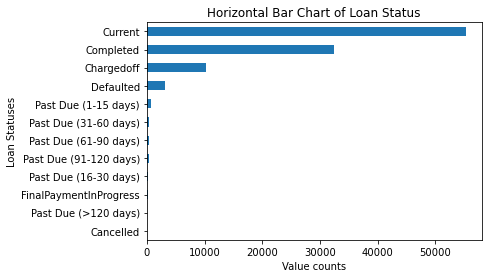

In [17]:
# generating the value counts for each of the loan status
print(LoanData_final['LoanStatus'].value_counts(ascending=True))
# plot bar chart showing the variation of loan status
LoanData_final['LoanStatus'].value_counts(ascending=True).plot(kind='barh')
plt.title('Horizontal Bar Chart of Loan Status')
plt.ylabel('Loan Statuses')
plt.xlabel('Value counts')
plt.show()

Therefore, the graph above shows that most of the loan statuses are (current, completed, chargedoff,Defaulted and pastDue(1-15days). Therefore, other loan statuses have very small percentages compared to those ones.

### Next up, the first predictor variable of interest: StatedMonthlyIncome

In [18]:
LoanData_final['StatedMonthlyIncome']

0         3083.333333
1         6125.000000
3         2875.000000
4         9583.333333
5         8333.333333
             ...     
113932    4333.333333
113933    8041.666667
113934    2875.000000
113935    3875.000000
113936    4583.333333
Name: StatedMonthlyIncome, Length: 103244, dtype: float64

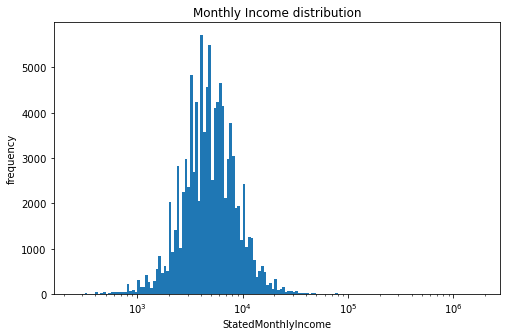

In [19]:
# setting the bin size
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(LoanData_final['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

# plot histogram distribution of monthly income
plt.figure(figsize=[8, 5])
plt.hist(data = LoanData_final, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xlabel('StatedMonthlyIncome')
plt.title('Monthly Income distribution')
plt.ylabel('frequency')
plt.show()

From the graph above, we can see that more monthly incomes are distributed in a multimodal form

### let move on to other predictors

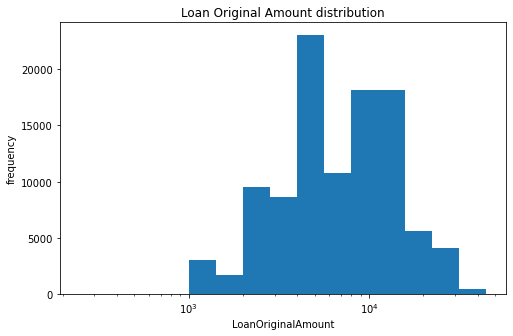

In [20]:
# let us look on the distribution for LoanOriginalAmount
log_binsize = 0.15
bins = 10 ** np.arange(2.4, np.log10(LoanData_final['LoanOriginalAmount'].max())+log_binsize, log_binsize)


plt.figure(figsize=[8, 5])
plt.hist(data = LoanData_final, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
# plt.xticks([500000, 1e5, 2e5, 5e5, 7e5, 12e4], [500000, '100k', '200k', '500k', '700k', '120k'])
plt.xlabel('LoanOriginalAmount')
plt.title('Loan Original Amount distribution')
plt.ylabel('frequency')
plt.show()

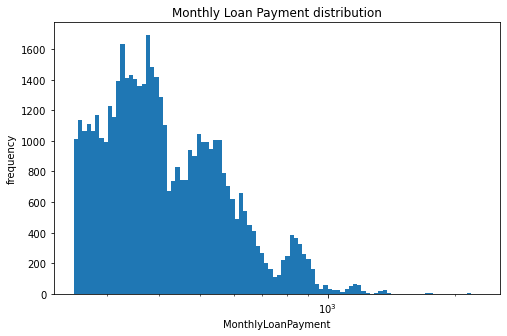

In [21]:
# let us look on the distribution for MonthlyLoanPayment
log_binsize = 0.01
bins = 10 ** np.arange(2.4, np.log10(LoanData_final['MonthlyLoanPayment'].max())+log_binsize, log_binsize)


plt.figure(figsize=[8, 5])
plt.hist(data = LoanData_final, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
# plt.xticks([500000, 1e5, 2e5, 5e5, 7e5, 12e4], [500000, '100k', '200k', '500k', '700k', '120k'])
plt.xlabel('MonthlyLoanPayment')
plt.title('Monthly Loan Payment distribution')
plt.ylabel('frequency')
plt.show()

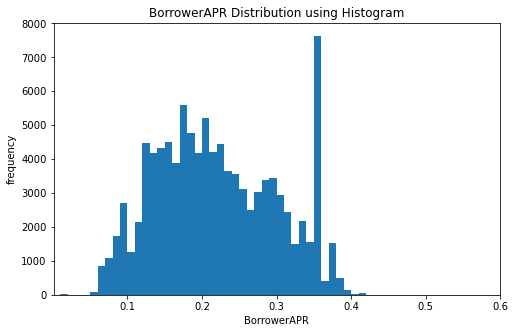

In [22]:
 # investigating further on an even smaller bin size
binsize = 0.01
bins = np.arange(0, 0.6, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = LoanData_final, x = 'BorrowerAPR', bins=bins)
plt.xlim([0.001,0.6])
plt.title('BorrowerAPR Distribution using Histogram')
plt.xlabel('BorrowerAPR')
plt.ylabel('frequency')
plt.show()

The graph above shows that we have the peak value of BorrowerAPR between 0.3 and 0.4

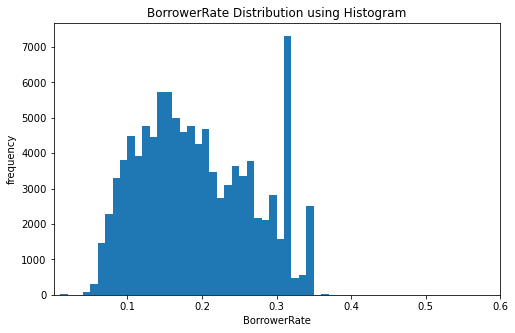

In [23]:
binsize = 0.01
bins = np.arange(0, 0.6, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = LoanData_final, x = 'BorrowerRate', bins=bins)
plt.xlim([0.001,0.6])
plt.title('BorrowerRate Distribution using Histogram')
plt.xlabel('BorrowerRate')
plt.ylabel('frequency')
plt.show()

The graph above shows that we have the peak value of BorrowerRate between 0.3 and 0.35

### other predictors = BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange
### let's plot all five together to get an idea of each ordinal variable's distribution.

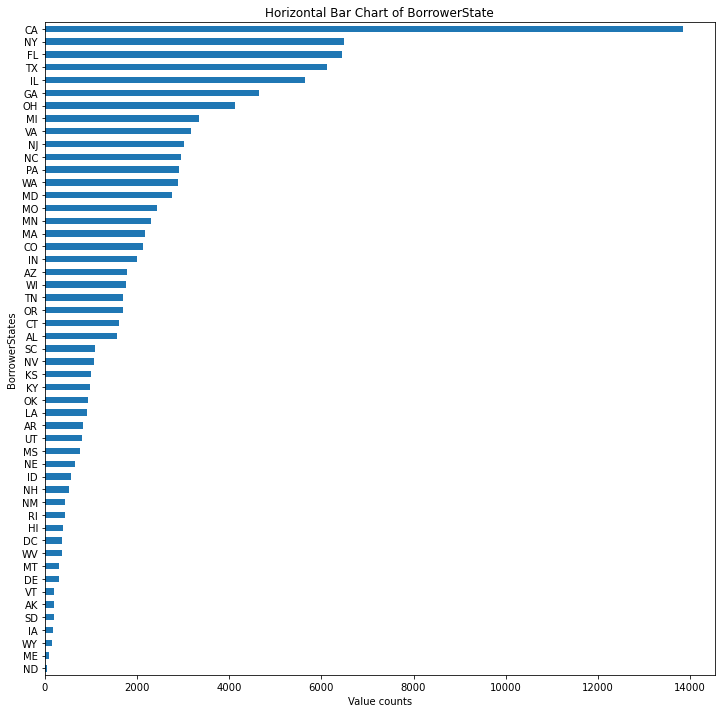

In [24]:
# bar graph for BorrowerState
plt.figure(figsize=(12, 12))
LoanData_final['BorrowerState'].value_counts(ascending=True).plot(kind='barh')
plt.title('Horizontal Bar Chart of BorrowerState')
plt.ylabel('BorrowerStates')
plt.xlabel('Value counts')
plt.show()

The bar graph above shows the most states with more people requesting the loans. here are the states arranged in their ascending order of more people requesting for loan CA,NY,FL,TX,IL,GA,OH and more others

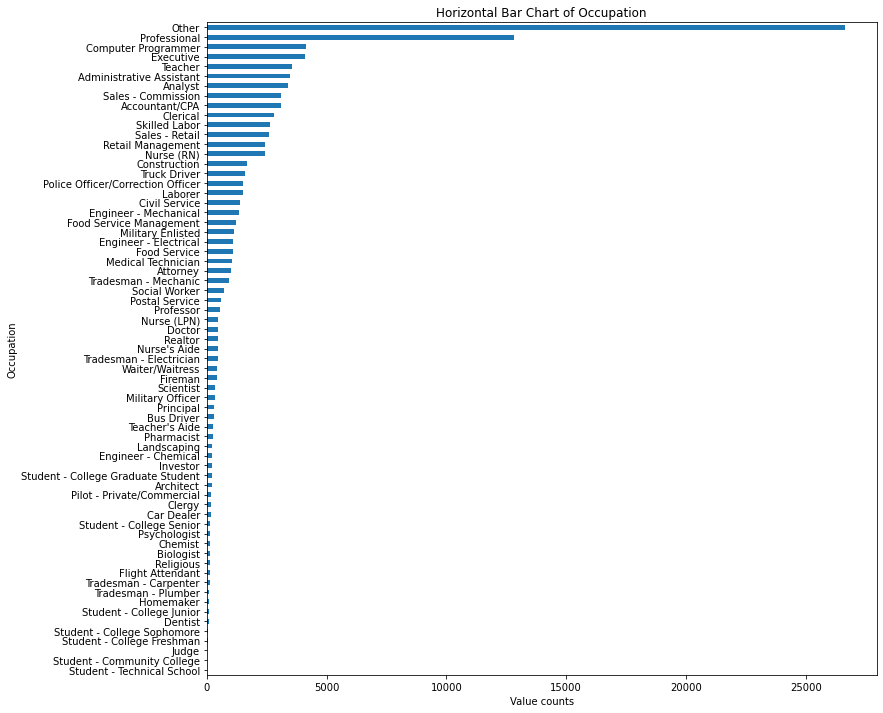

In [25]:
# bar graph for Occupation
plt.figure(figsize=(12, 12))
LoanData_final['Occupation'].value_counts(ascending=True).plot(kind='barh')
plt.title('Horizontal Bar Chart of Occupation')
plt.ylabel('Occupation')
plt.xlabel('Value counts')
plt.show()

The bar graph above shows how occupation affect the loan requesting. From the data we have, we can see that Professionals, Computer programmers, Executives, Teachers, Admistrative Assistants, Analyts.... are the ones with largest percentage for requesting the loan

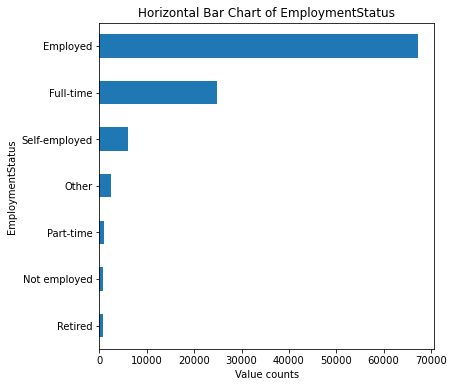

In [26]:
# bar graph for EmploymentStatus
plt.figure(figsize=(6, 6))
LoanData_final['EmploymentStatus'].value_counts(ascending=True).plot(kind='barh')
plt.title('Horizontal Bar Chart of EmploymentStatus')
plt.ylabel('EmploymentStatus')
plt.xlabel('Value counts')
plt.show()

This bar graph above also shows how the employment status affect loan requesting. We can now see that people who are employed, full-time and self-employed are the most ones requesting for loan

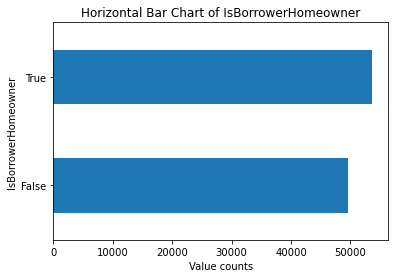

In [27]:
# bar graph for IsBorrowerHomeowner
plt.figure(figsize=(6, 4))
LoanData_final['IsBorrowerHomeowner'].value_counts(ascending=True).plot(kind='barh')
plt.title('Horizontal Bar Chart of IsBorrowerHomeowner')
plt.ylabel('IsBorrowerHomeowner')
plt.xlabel('Value counts')
plt.show()

This bar graph above is showing us that the people who owns home are more likely to request loan than the ones who don't. However, the difference is not that big number

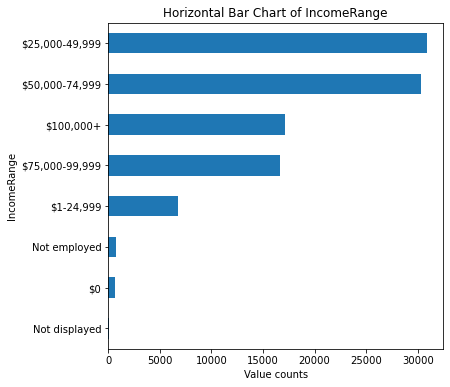

In [28]:
# bar graph for IncomeRange
plt.figure(figsize=(6, 6))
LoanData_final['IncomeRange'].value_counts(ascending=True).plot(kind='barh')
plt.title('Horizontal Bar Chart of IncomeRange')
plt.ylabel('IncomeRange')
plt.xlabel('Value counts')
plt.show()

This bar plot above is showing us how the income range increases the loan requested. For instance, the data shows that people with income in the range 25k-50k requested loan than people with income in the range 50k-75k, then followed also by people with income in the range 100k+, followed by 75k-100k, then 1-25k. Therefore, the lesser people who requested for loan comes from not employed and the ones with 0 income. all amount are in USD

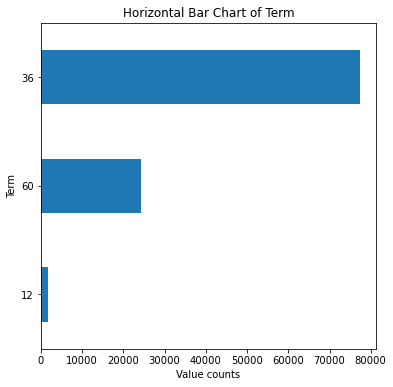

In [29]:
# Let also see how the length of the loan in months varies between people who requested the loan
# bar graph for loan lenth
plt.figure(figsize=(6, 6))
LoanData_final['Term'].value_counts(ascending=True).plot(kind='barh')
plt.title('Horizontal Bar Chart of Term')
plt.ylabel('Term')
plt.xlabel('Value counts')
plt.show()

Therefore, the data indicates that most of the loans requested have length of 3years(36months), followed by 5years(60months) and the least one is 1year(12months)

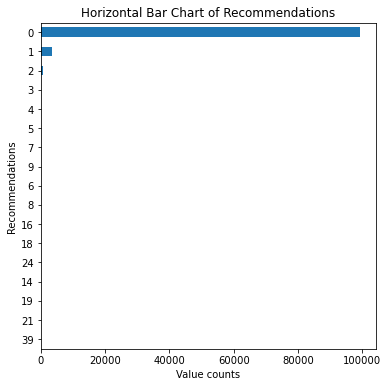

In [30]:
# Let also see how the Recommendations for the loan help people to get loans
# bar graph for Recommendations
plt.figure(figsize=(6, 6))
LoanData_final['Recommendations'].value_counts(ascending=True).plot(kind='barh')
plt.title('Horizontal Bar Chart of Recommendations')
plt.ylabel('Recommendations')
plt.xlabel('Value counts')
plt.show()


Therefore, we can see that many people with zero recommendation requested loan, followed by people with 1 recommendation, then 2 recommendation etc. Therefore, the key insights in this figure is that recommendations do not affect people to request and get loan.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Monthly Income, Monthly loan payment and the loan amount variables took on a large range of values, so I looked at the data using a log transform. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the Monthly Income, Monthly loan payment and the loan amount size variables, a number of outlier points were identified. Overall, people do have different salary and different source of income and therefore those people request different loans. Therefore, these outliers points can not be neglected or deleted since they are sensitive to the target questions as they vary depending on peoples income.


## Bivariate Exploration

To start off with, lets look at the pairwise correlations present between features in the data.

In [31]:
# let first separate the numerical variables and the categorical variables from the final data frame we are using

numeric_vars = ['Term', 'BorrowerAPR', 'BorrowerRate', 'EmploymentStatusDuration', 'TotalInquiries',
               'AvailableBankcardCredit','TotalTrades','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment',
               'Recommendations']
categoric_vars = ['LoanStatus', 'BorrowerState', 'Occupation','EmploymentStatus','IsBorrowerHomeowner','IncomeRange']

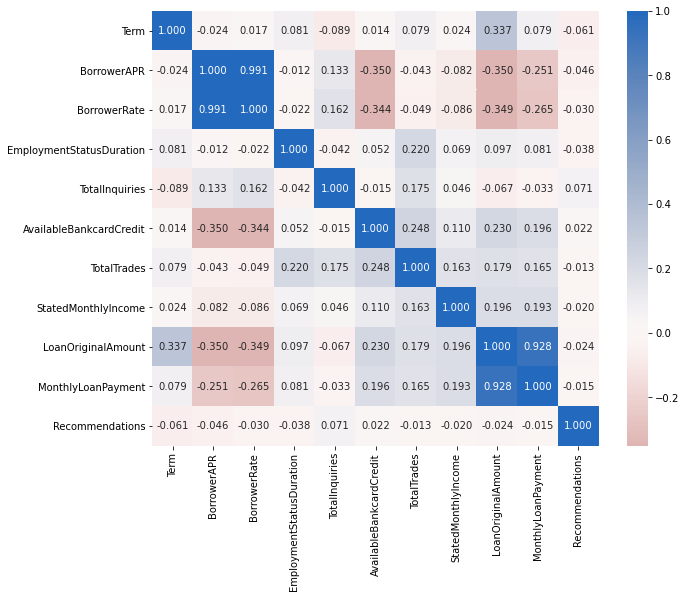

In [32]:
# correlation plot
plt.figure(figsize = [10, 8])
sb.heatmap(LoanData_final[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

LoanData.shape= (103244, 17)
LoanData_samp.shape= (500, 17)


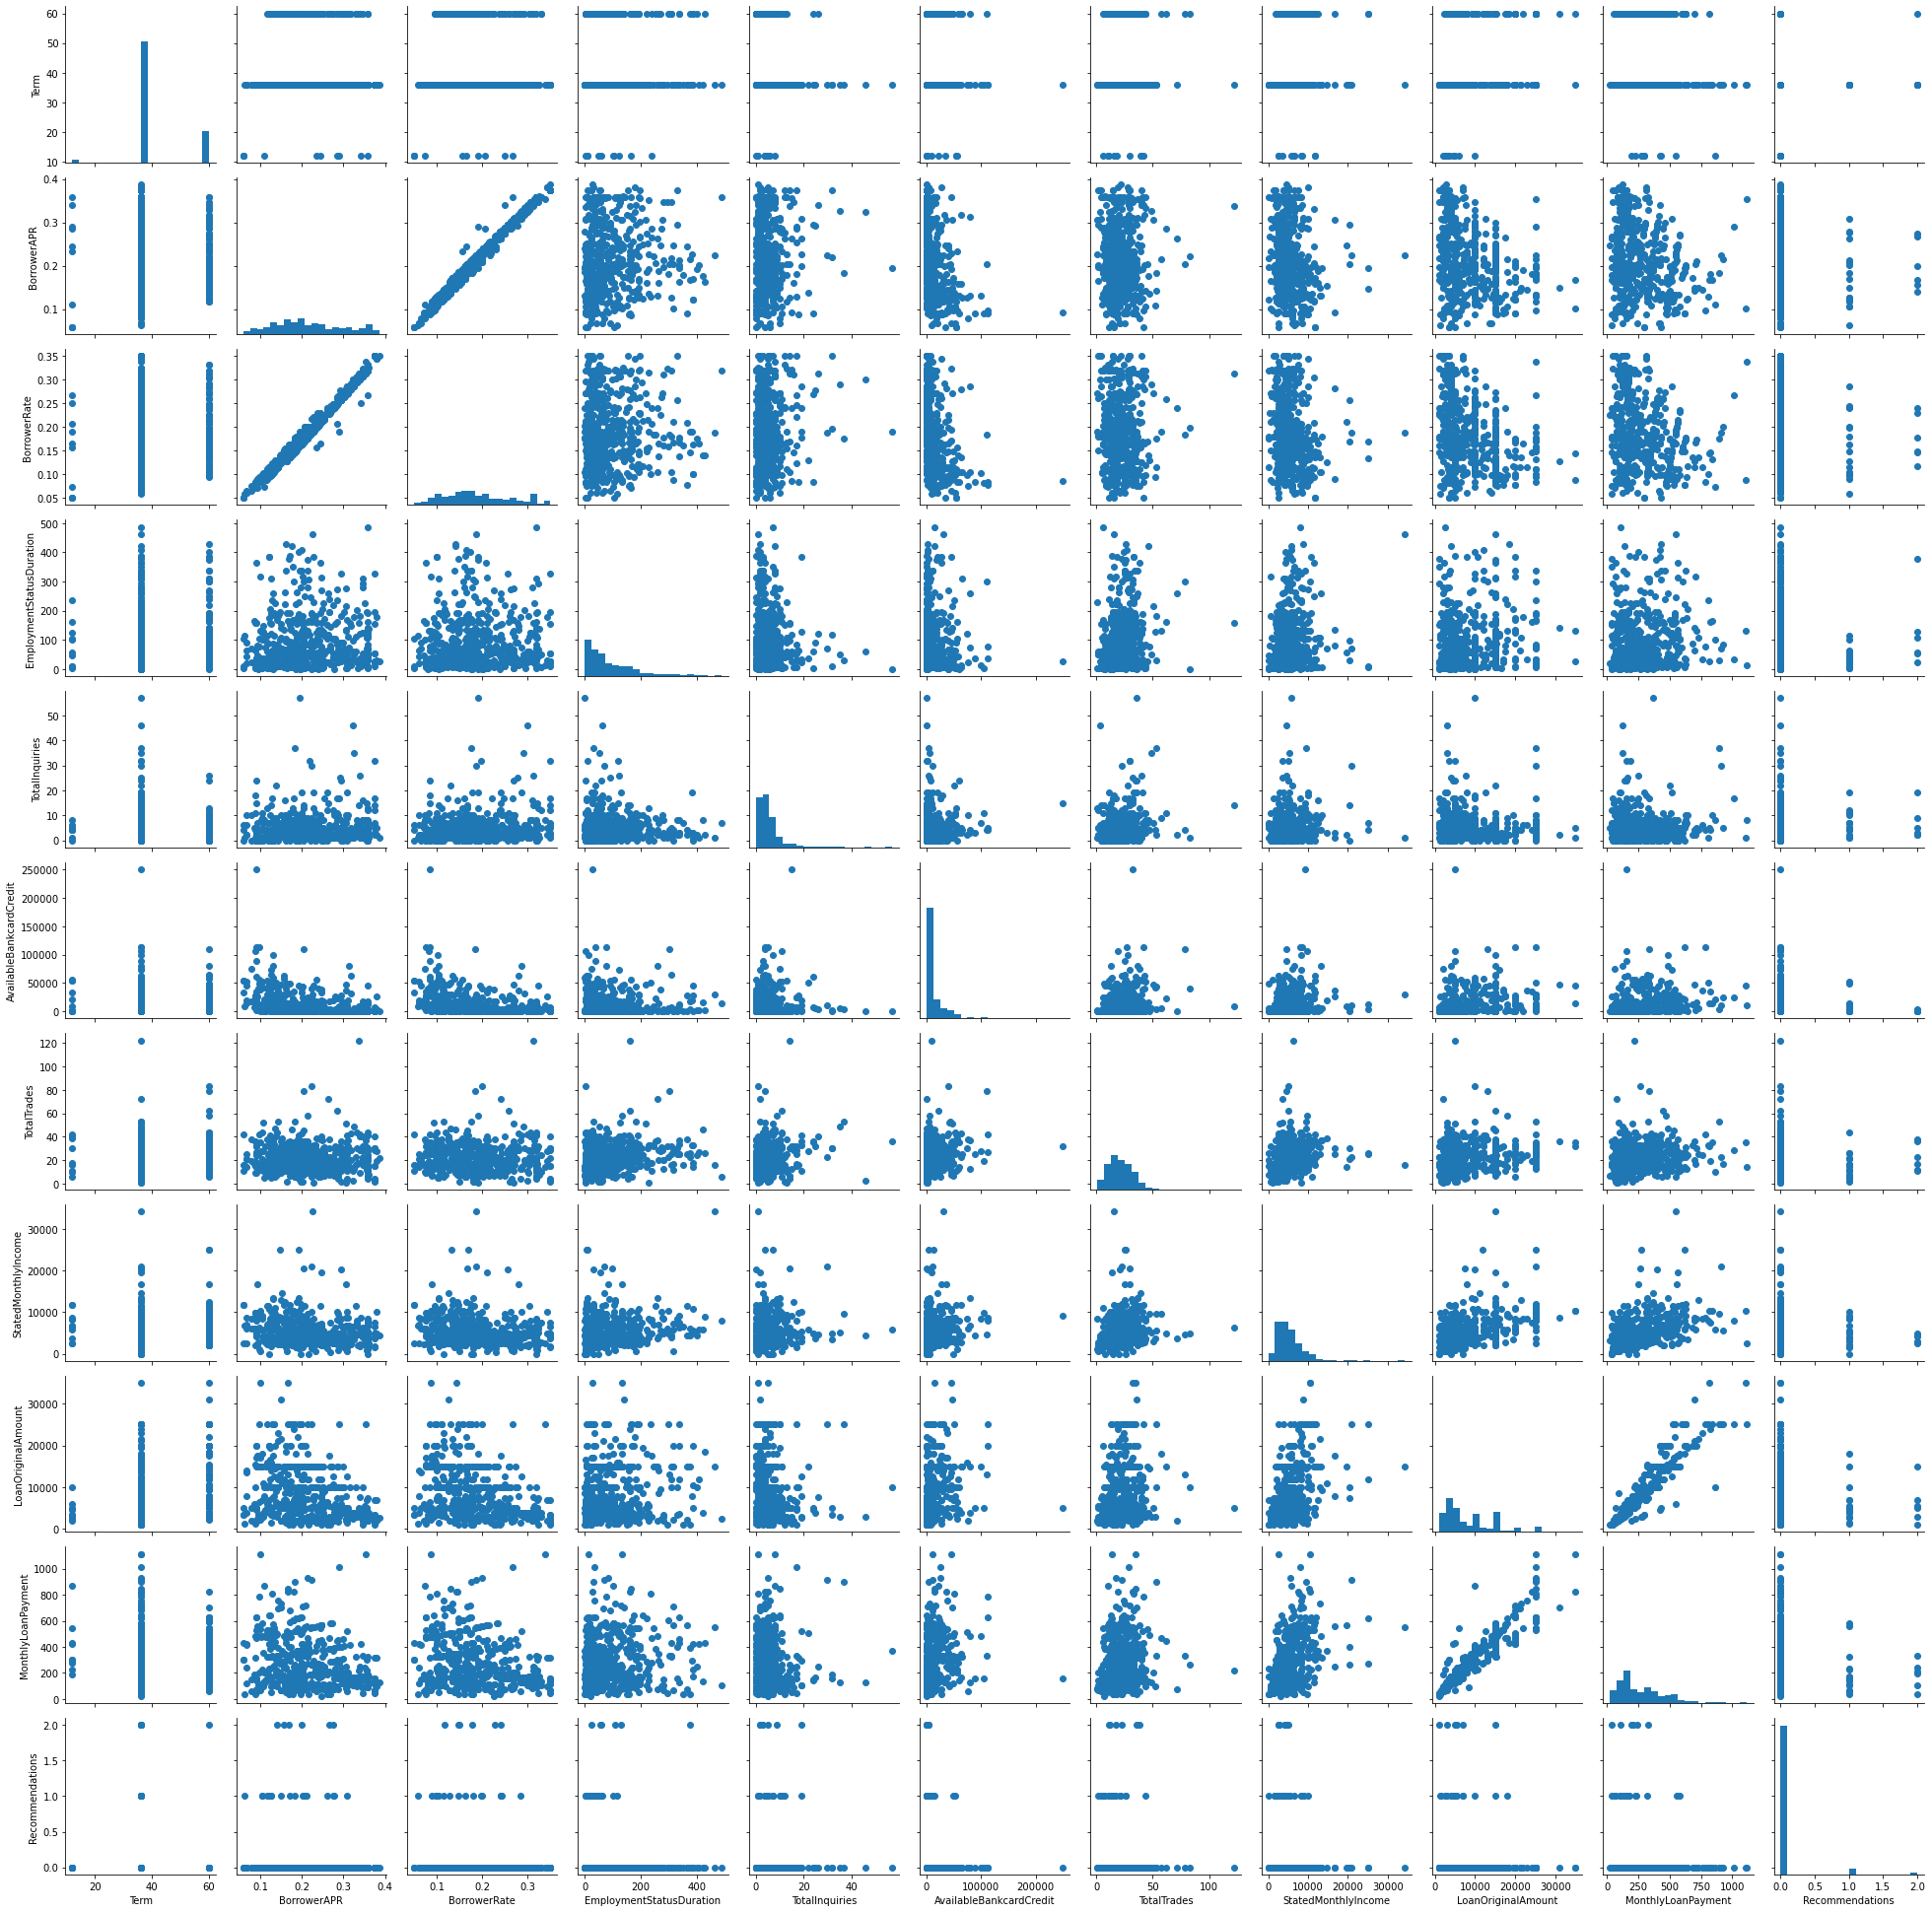

In [33]:
# plot matrix: sample 1000 loans so that plots are clearer and they render faster

print("LoanData.shape=",LoanData_final.shape)
LoanData_samp = LoanData_final.sample(n=500, replace = False)
print("LoanData_samp.shape=",LoanData_samp.shape)

g = sb.PairGrid(data = LoanData_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As expected, the 'BorrowerAPR' and 'BorrowerRate' are all highly correlated with one another and are both correlated with LoanOriginalAmount. In addition, the 'LoanOriginalAmount' and 'MonthlyLoanPayment' are all highly correlated with one another too.  


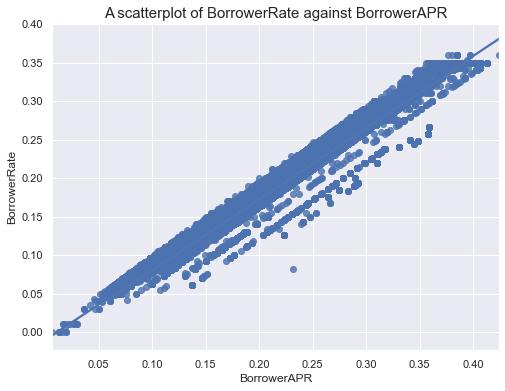

In [34]:
# Now let see the scatter plots of the most correlated variables
# Scatter plot of BorrowerAPR and BorrowerRate
plt.figure(figsize=(8,6))
sb.set()
sb.regplot(data = LoanData_final, x = 'BorrowerAPR', y = 'BorrowerRate');
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')
plt.title(f'A scatterplot of BorrowerRate against BorrowerAPR',fontsize=15 )
plt.show()

Therefore, we can see that there is a very strong positive correlation between BorrowerAPR and BorrowerRate. This means that the increase of one variable led to the increase in other variable.

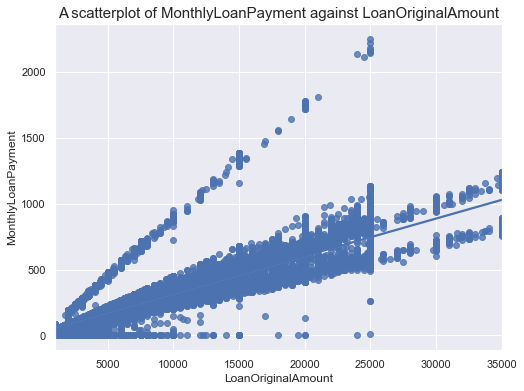

In [35]:
# Scatter plot of LoanOriginalAmount and MonthlyLoanPayment
plt.figure(figsize=(8,6))
sb.set()
sb.regplot(data = LoanData_final, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment');
plt.xlabel('LoanOriginalAmount')
plt.ylabel('MonthlyLoanPayment')
plt.title(f'A scatterplot of MonthlyLoanPayment against LoanOriginalAmount',fontsize=15 )
plt.show()

Therefore, fromt this graph also, we can see that there is a good positive correlation between LoanOriginalAmount and MonthlyLoanPayment. This means that the increase of one variable led to the increase in other variable. Therefore, by having large amount of loan, the client should expect to pay large amount of monthly loan payment

### Now lets explore the relationship between numerical and categorical features

In [36]:
# Recall the numerical and categorical features
numeric_vars = ['Term', 'BorrowerAPR', 'BorrowerRate', 'EmploymentStatusDuration', 'TotalInquiries',
               'AvailableBankcardCredit','TotalTrades','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment',
               'Recommendations']
categoric_vars = ['LoanStatus', 'BorrowerState', 'Occupation','EmploymentStatus','IsBorrowerHomeowner','IncomeRange']

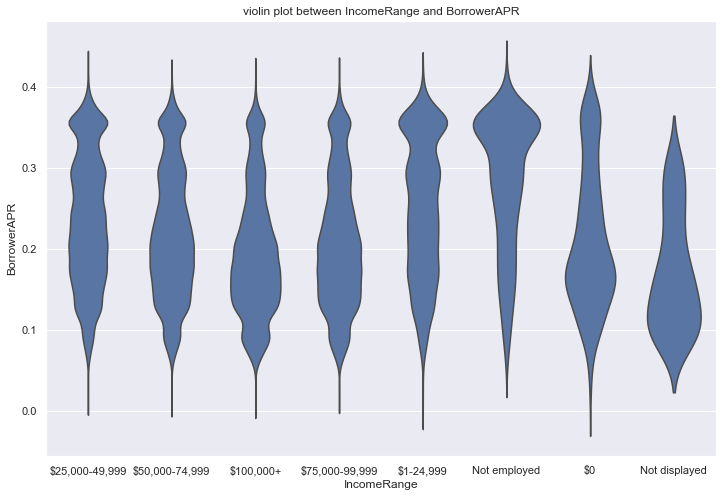

In [37]:
# lets look at the violin plot between 
plt.figure(figsize=(12,8))
sb.violinplot(data=LoanData_final, x='IncomeRange', y='BorrowerAPR',color=sb.color_palette()[0], inner=None)
plt.title('violin plot between IncomeRange and BorrowerAPR')
plt.show()

In [38]:
# creating a function that will display pie chart between two different features

def plot_pie(df,col1,col2):
    df_mean = df.groupby(col1)[col2].mean()
    plt.figure(figsize=(10,8))
    plt.pie(df_mean, labels = df_mean.index, startangle = 90, autopct='%1.1f%%')
    plt.axis('square') 
    plt.title(f"{col1} vs {col2}",fontsize=15,fontweight="bold");

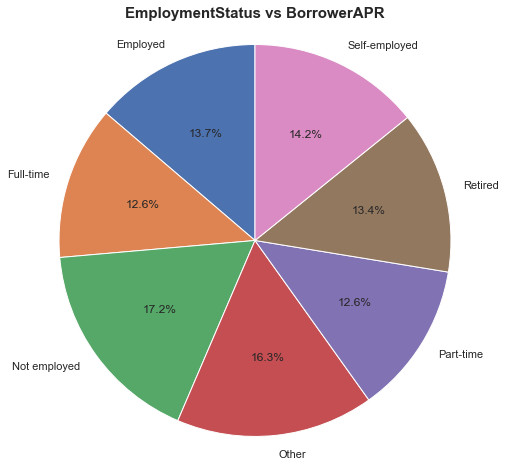

In [39]:
plot_pie(LoanData_final,'EmploymentStatus','BorrowerAPR')

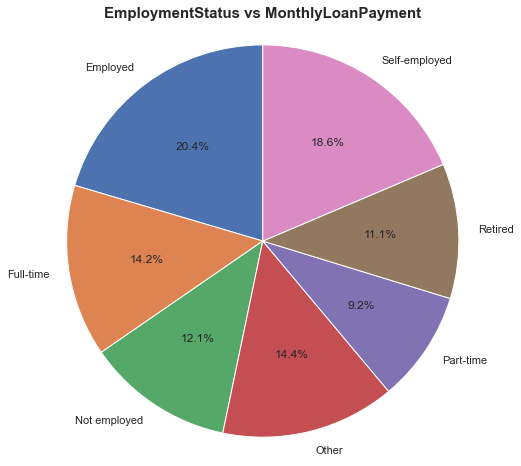

In [40]:
plot_pie(LoanData_final,'EmploymentStatus','MonthlyLoanPayment')

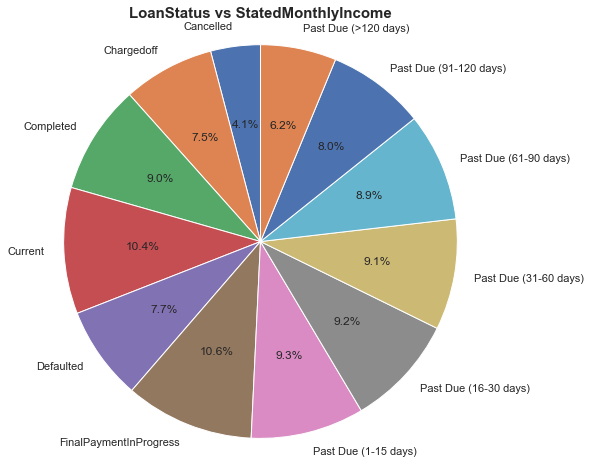

In [41]:
plot_pie(LoanData_final,'LoanStatus','StatedMonthlyIncome')

### Observation

The above plots illustrates the relationship between numerical and categorical features where the first plot shows the violin plot between income range and BorrowerAPR and the remaining plots are pic charts showing different categories with their corresponding numerical variables. For instance, the `violon plot` shows that `not displayed` income range have the lowest BorrowerAPR while `not employed and 100k+` have the highest BorrowerAPR.

In addition, the pie charts between `employment status and BorrowerAPR` indicates that `not employed` have the highest BorrowerAPR than others, the pie chart between `employment status and monthly loan payment` indicates that `employed` category have the highest monthly loan payment than others and then pie chart between `loan status and stated monthly income` shows that `Final Payment Progress` have the highest score i.e the higher the income, the more the people pay loan.


### let also explore the relationship between two categorical features

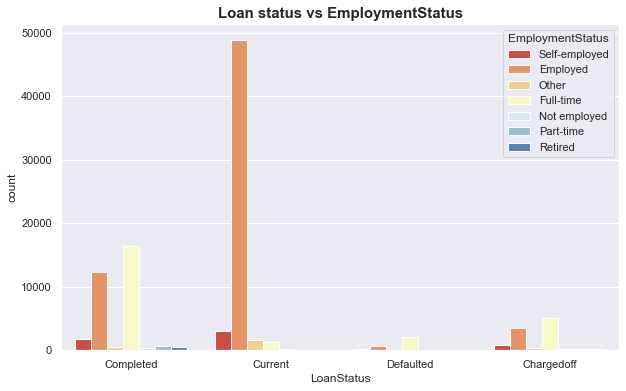

In [42]:
# let work on loan status informations
# Extract the most loan status in the data set
LoanData_final_best_loanStatus = LoanData_final[LoanData_final['LoanStatus'].isin(['Current','Completed','Chargedoff',
                                                                                  'Defaulted'])]
# ploting the best loan data status with EmploymentStatus
plt.figure(figsize=(10,6))
sb.countplot(data = LoanData_final_best_loanStatus, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'RdYlBu')
plt.title('Loan status vs EmploymentStatus',fontsize=15,fontweight="bold");

The bar graph above help us to analyse each loan status with their corresponding employment category. For instance, in the `Completed` loan status we can see that more people from `Full-time` employment status have already completed to pay their loan, followed by people from `Employed` category, then people from `self-employed` category and so on. This can be observed in each and every loan status as shown on the graph above. for instance, in the `current` loan status we see that we have more and more people from `Employed` employment status. This is actually related to the reality.

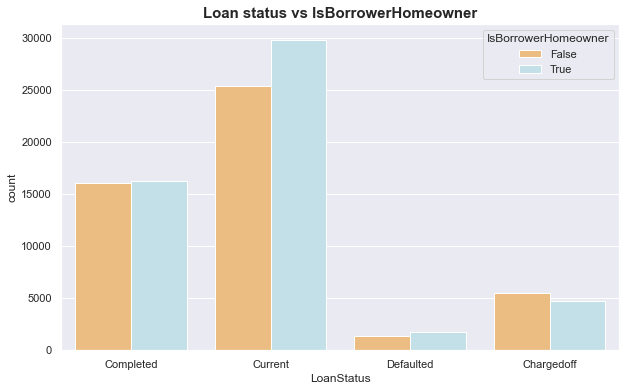

In [43]:
# let work on loan status informations
# Extract the most loan status in the data set
LoanData_final_best_loanStatus = LoanData_final[LoanData_final['LoanStatus'].isin(['Current','Completed','Chargedoff',
                                                                                  'Defaulted'])]
# ploting the best loan data status with IsBorrowerHomeowner
plt.figure(figsize=(10,6))
sb.countplot(data = LoanData_final_best_loanStatus, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'RdYlBu')
plt.title('Loan status vs IsBorrowerHomeowner',fontsize=15,fontweight="bold");

The bar graph above is showing us the effect of having home i.e if the borrower owns a home or not. Therefore, we can see that in the `current, defaulted and compled` loan status, we have more people who owns home than the ones who don't. while in the `Chargedoff` loan status, we have more people who don't own home than the ones who owns their home

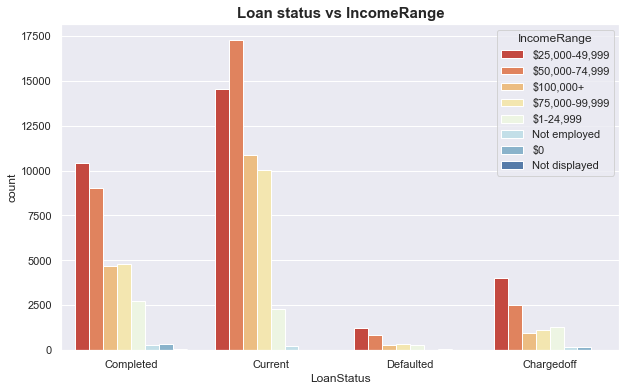

In [44]:
# let work on loan status informations
# Extract the most loan status in the data set
LoanData_final_best_loanStatus = LoanData_final[LoanData_final['LoanStatus'].isin(['Current','Completed','Chargedoff',
                                                                                  'Defaulted'])]
# ploting the best loan data status with IncomeRange
plt.figure(figsize=(10,6))
sb.countplot(data = LoanData_final_best_loanStatus, x = 'LoanStatus', hue = 'IncomeRange', palette = 'RdYlBu')
plt.title('Loan status vs IncomeRange',fontsize=15,fontweight="bold");

The bar graph above help us to analyse each loan status with their corresponding IncomeRange. For instance, can observe that for each category of loan status, we have more people from `25,000-49,999 and 50,000-74,999` income ranges. 

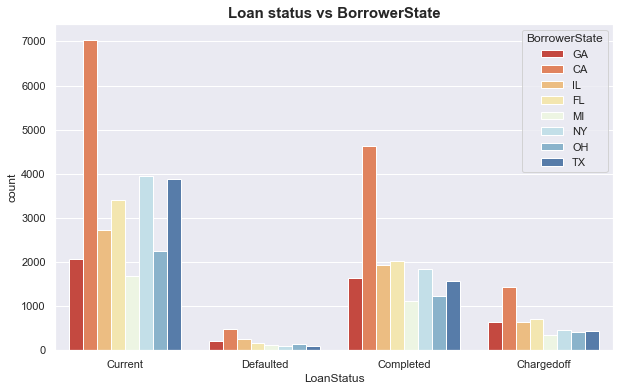

In [45]:
# let work on loan status informations
# Extract the most loan status and the most Borrower state  in the data set
LoanData_best = LoanData_final[(LoanData_final['LoanStatus'].isin(['Current','Completed','Chargedoff','Defaulted'])) & 
                       (LoanData_final['BorrowerState'].isin(['CA','NY','FL','TX','IL','GA','OH','MI']))]
# ploting the best loan data status with BorrowerState
plt.figure(figsize=(10,6))
sb.countplot(data = LoanData_best, x = 'LoanStatus', hue = 'BorrowerState', palette = 'RdYlBu')
plt.title('Loan status vs BorrowerState',fontsize=15,fontweight="bold");

In this bar graph above, I was trying to analyse the best states from the bar plot of states plotted previously to see how the loan status vary according to the states. For instance, the most people who completed to pay their loans comes from `CA` region followed by `FL` then `IL` and so on as we can see. This can also be done in each loan status to see which state is more effective than others

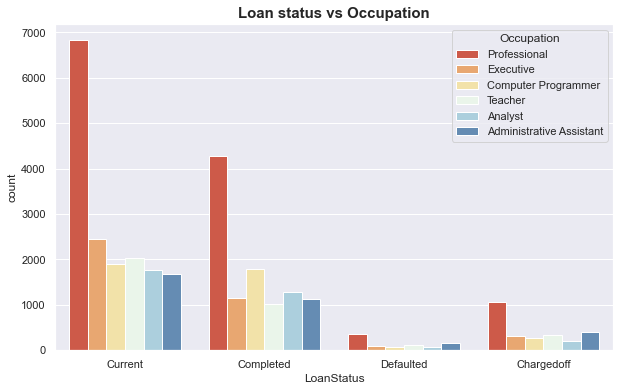

In [46]:
# let work on loan status informations
# Extract the most loan status and the most Occupation  in the data set
LoanData_best = LoanData_final[(LoanData_final['LoanStatus'].isin(['Current','Completed','Chargedoff','Defaulted'])) & 
                       (LoanData_final['Occupation'].isin(['Professional','Computer Programmer','Executive',
                                                           'Teacher','Administrative Assistant','Analyst']))]
# ploting the best loan data status with BorrowerState
plt.figure(figsize=(10,6))
sb.countplot(data = LoanData_best, x = 'LoanStatus', hue = 'Occupation', palette = 'RdYlBu')
plt.title('Loan status vs Occupation',fontsize=15,fontweight="bold");

The bar plot above is also designed to help us analyse the variability of loan payment according to people's occupation. For instance, in the `Completed` loan status, data shows that the `professional` are the best followed by `Computer Programmers` and the least are the `Teachers`. This can also be performed in each loan status to see how the people's occupation varies

# Observation on Bivariate Exploration

In Bivariate analysis, we are able to analyse data using two variables or two featues either numerical or categorical or the combination of both features. In this exploration, I used five kinds of plots to obtain insights which are `scatterplot, violinplot, heatmap, pie charts adn bar charts plots`. I obtained many insights for the variables I was using in my plots. For instance, I found that `there is a very strong positive correlation between BorrowerAPR and BorrowerRate`, and also `there is a good positive correlation between LoanOriginalAmount and MonthlyLoanPayment` from the `scatter plots`. In addition, from the bar plots, we found that the most people whose their loan status is `completed`  comes from `CA` region followed by `FL` and moreover, in the `Completed` loan status, data shows that the `professional` are the best followed by `Computer Programmers` and the least ones are the `Teachers` from the people's occupation.

# Multivariate Exploration

### Creating plots of three or more variables to investigate data even further

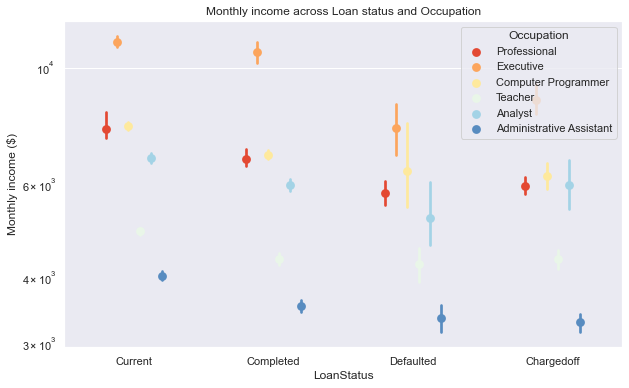

In [47]:
# Extract the most loan status and the most Occupation  in the data set
LoanData_best = LoanData_final[(LoanData_final['LoanStatus'].isin(['Current','Completed','Chargedoff','Defaulted'])) & 
                       (LoanData_final['Occupation'].isin(['Professional','Computer Programmer','Executive',
                                                           'Teacher','Administrative Assistant','Analyst']))]
fig = plt.figure(figsize = [10,6])
ax = sb.pointplot(data = LoanData_best, x = 'LoanStatus', y = 'StatedMonthlyIncome', hue = 'Occupation',
           palette = 'RdYlBu', linestyles = '', dodge = 0.4)
plt.title('Monthly income across Loan status and Occupation')
plt.ylabel('Monthly income ($)')
plt.yscale('log')
plt.show();

The point plot above indicates that `Executive, computer programmers and professionals` have generally `high monthly income` compared to others. It also shows that the `Administrative Assistant` have the `lowest monthly income` compared to those five occupations selected

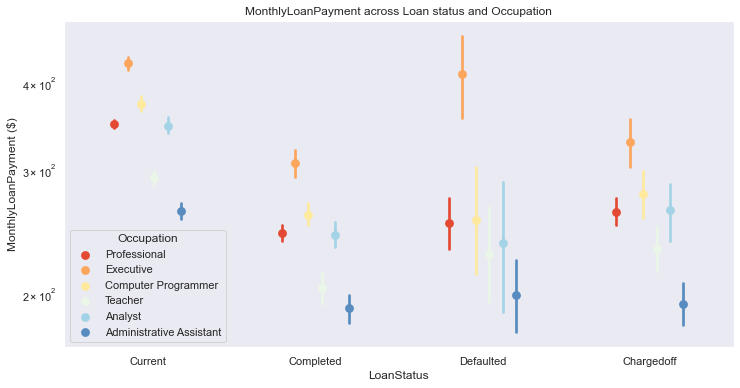

In [48]:
# Extract the most loan status and the most Occupation  in the data set
LoanData_best = LoanData_final[(LoanData_final['LoanStatus'].isin(['Current','Completed','Chargedoff','Defaulted'])) & 
                       (LoanData_final['Occupation'].isin(['Professional','Computer Programmer','Executive',
                                                           'Teacher','Administrative Assistant','Analyst']))]
fig = plt.figure(figsize = [12,6])
ax = sb.pointplot(data = LoanData_best, x = 'LoanStatus', y = 'MonthlyLoanPayment', hue = 'Occupation',
           palette = 'RdYlBu', linestyles = '', dodge = 0.4)
plt.title('MonthlyLoanPayment across Loan status and Occupation')
plt.ylabel('MonthlyLoanPayment ($)')
plt.yscale('log')
plt.show();

The point plot above indicates that `Executive, computer programmers, Analyst and professionals` pay generally `high monthly loan payment` compared to others. It also shows that the `Administrative Assistant` have the `lowest monthly loan payment` in each loan status. However, in `Defaulted` loan status, the data depicts that `Executives` are much higher than others

In [49]:
# Extract the most loan status and the most Occupation  in the data set
LoanData_best = LoanData_final[(LoanData_final['LoanStatus'].isin(['Current','Completed','Chargedoff','Defaulted'])) & 
                       (LoanData_final['Occupation'].isin(['Professional','Computer Programmer','Executive',
                                                           'Teacher','Administrative Assistant','Analyst']))]

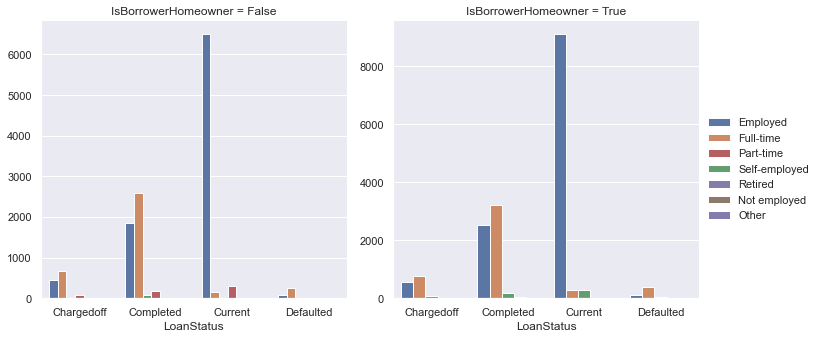

In [50]:
# Now let's look at the relationship between LoanStatus, IsBorrowerHomeowner and EmployementStatus
def countplot(x, hue,**kwargs):
    data=kwargs.pop("data")
    order=np.unique(data['LoanStatus'].values)
    sb.countplot(x, hue=hue, data=data,order=order,**kwargs)
    
g = sb.FacetGrid(LoanData_best, col='IsBorrowerHomeowner',  size=5, height=3, aspect=1, sharex=False, sharey=False)
g.map_dataframe(countplot, 'LoanStatus',hue='EmploymentStatus', alpha=.99,
                palette=sb.color_palette())
g.fig.subplots_adjust(top=0.9)
g.add_legend();

In this FacetGrid plot above, I was able to analyse the relationship between three features `IsBorrowerHomeowner,LoanStatus and EmploymentStatus` using multivariate plot. From the graphs above, we can now observe that more people `who owns home` and have `current` loan status are `Employed`, while those `who owns home` and have `Completed loan status`, the majority are `Full-time` employment status followed by `employed `ones. In addition, for those who `don't own home`, the majoriy have `current` loan status and are `employed`, and then the majoriy with `Completed` loan status are `full-time`.

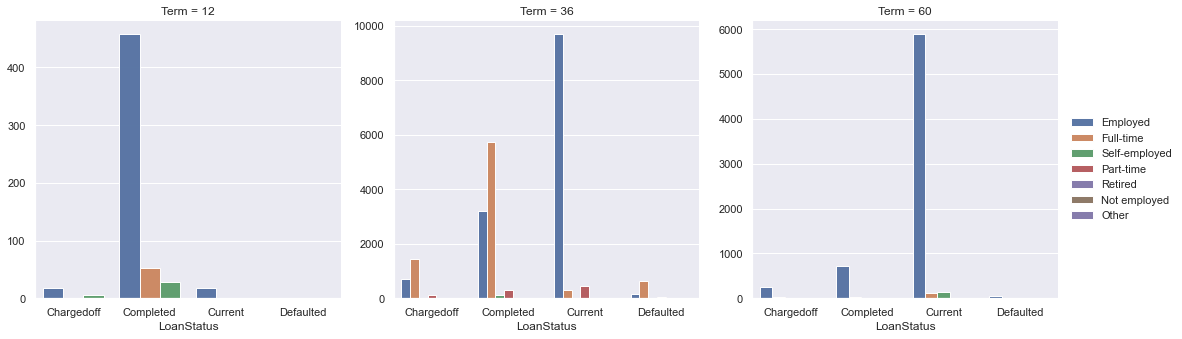

In [51]:
# Now let's look at the relationship between LoanStatus, Term and EmployementStatus all together
def countplot(x, hue,**kwargs):
    data=kwargs.pop("data")
    order=np.unique(data['LoanStatus'].values)
    sb.countplot(x, hue=hue, data=data,order=order,**kwargs)
    
g = sb.FacetGrid(LoanData_best, col='Term',  size=5, height=3, aspect=1, sharex=False, sharey=False)
g.map_dataframe(countplot, 'LoanStatus',hue='EmploymentStatus', alpha=.99,
                palette=sb.color_palette())
g.fig.subplots_adjust(top=0.9)
g.add_legend();

In this FacetGrid plot above, I was able to analyse the relationship between three features `Term,LoanStatus and EmploymentStatus` using multivariate plot. From the graphs above, we can now observe that more people `with Term = 36 i.e 3years` and have `current` loan status are `Employed`, while those `with Term = 36` and have `Completed loan status`, the majority are `Full-time` employment status followed by `employed `ones. In addition, from the data we can conclude that we have few peole whose loan is for `only 12 months or 1 year`. this indicates that people `don't like to have short term loan`. Moreover, `for 5 years or 60 months`, we have only `3 kinds` of employment status that have this `long term loan`, these are `Employed, Full-time and self-employed` categories.

# Observation on Multivariate Exploration

In multivariate exploration, I used three features in the same graph to grab some insights between their relationships. I used two kinds of graphs `Pointplots and Facetgrid plots` to grab some insights. From there, I found that `Executive, computer programmers and professionals` have generally `high monthly income` compared to others. And therefore, the pointplot indicates that those `Occupation` with highly monthly income also pay `highly monthly loan payment`. Moreover, I found that many like have 3 years loan and only few have 1 year loan. In addition to this, only three kinds of employment status have 5 years loan. those are `Employed, Full-time and self-employed` categories.

# Conclusions

    In this project, I tried to understand well the Prosper loan data, do the analysis and get insights that should be communicated. I used exploration analysis to obtain some insights. Throughout this notebook, I firsth did data wrangling where I first checked the data frame shape, columns types, missing values i.e information on the data and then I cleaned the data to remain with the features that helped me to answer the questions I had in mind. In this view, I first read the metadata to understand well each feature/column and use my knowledge to remain with columns that will be able to answer my questions.

    After remaining with clear data frame, I did three kinds of analysis which are `Univariate, Bivariate and Multivariate Analysis`. In univariate analysis, I was able to analyse each feature individually using like bar plots and histograms to see their distributions. In Bivariate, I was able to analyse two features together to see their relationship, for instance scatter plot and correlation heatmap helped me to obtain the features that are correlated between themselves where for example I saw that `there is a very strong positive correlation between BorrowerAPR and BorrowerRate`. In Multivariate, I was also able to look at the relationship between three variables all together which helped me to obtain more insights from the data, for instance, for example I found that more people `with Term = 36 i.e 3years` and have `current` loan status are `Employed`.These analysis helped me to grab more insights amongest the features.


# Limitations

    In this project, I used ProsperLoanData which have many features/variables/columns where I had to choose few of them to analyse. It was difficult to select the best features to use since some of them were not understandable due to the abbreviations contained in them.

    In addition, I was challenged when I was dealing with missing values. Since these are loan data, money related data i.e dropping of filling NaN values of course will affect the results since these are sensitive observations that ofcourse affect the laon status in one way or another. I decided to drop the missing values.
